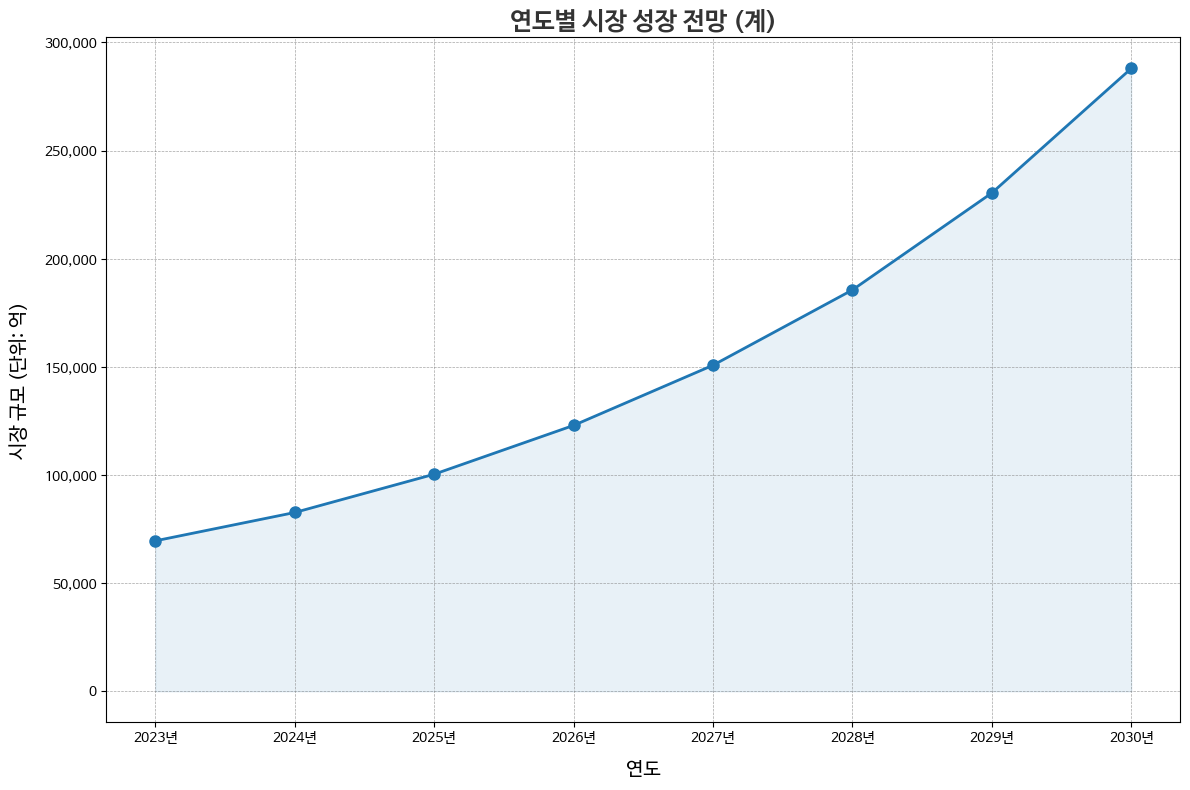

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib

# 폰트 설정 (한글이 깨지지 않도록)
matplotlib.rc("font", family = "NanumBarunGothic")
matplotlib.rc("axes", unicode_minus = False)

# 데이터 생성
data = {
    "대륙 구분": ["북미", "유럽", "아시아태평양", "중동&아프리카", "남미", "계"],
    "2023년": [21385.6, 17645.2, 16891.6, 7552.4, 6218.9, 69546.6],
    "2024년": [25069.0, 20873.1, 20291.1, 8942.9, 7476.5, 82652.6],
    "2025년": [30198.1, 25331.8, 24902.3, 10824.9, 9186.8, 100343.9],
    "2026년": [36674.2, 30782.8, 30337.4, 13129.1, 11313.8, 122912.4],
    "2027년": [44653.0, 37085.2, 38307.0, 16438.9, 13983.3, 150737.8],
    "2028년": [54322.9, 46114.0, 47565.8, 20318.6, 17353.4, 185547.9],
    "2029년": [66777.2, 57035.8, 59681.6, 25164.9, 21726.4, 230381.4],
    "2030년": [82612.4, 71006.0, 75362.4, 31584.4, 27400.0, 287965.2],
    "CAGR(%)": [21.4, 22.0, 23.8, 22.7, 23.6, 22.5]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# "계" 행의 데이터만 추출
total_growth = df[df["대륙 구분"] == "계"].iloc[0, 1:-1]

# 연도별 데이터
years = total_growth.index.astype(str)  # 혹시 모를 오류를 방지하기 위해 연도를 문자열로 변환
values = total_growth.values.astype(float)  # 값들을 실수형으로 변환

# 그래프 그리기
plt.figure(figsize=(12, 8))
plt.plot(years, values, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8)
plt.fill_between(years, values, color='#1f77b4', alpha=0.1)  # 그래프 아래 영역 채우기

# 그래프 제목과 축 레이블 추가
plt.title('연도별 시장 성장 전망 (계)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('연도', fontsize=14, labelpad=10)
plt.ylabel('시장 규모 (단위: 억)', fontsize=14, labelpad=10)

# Y축에 천 단위 쉼표 표시
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# 그리드 추가
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# 그래프 여백 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()


In [2]:
pip install pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 32.4 MB/s eta 0:00:00m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 34.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
# 엑셀 파일에서 데이터를 가져옴
df_data = pd.read_excel('/home/piai/다운로드/반도체 산업 동향_20240814141810.xlsx', sheet_name='반도체 산업 동향(e-나라지표)')

# 유효한 데이터가 시작되는 부분을 추출 (엑셀의 27번째 행 이후)
df_valid = df_data.iloc[27:].reset_index(drop=True)

# 첫 번째 행을 열 이름으로 설정
df_valid.columns = df_valid.iloc[0]
df_valid = df_valid.drop(0).reset_index(drop=True)

# 필요 없는 행과 열을 제거
df_valid = df_valid.dropna(how='all', axis=0)  # 모든 값이 NaN인 행 제거
df_valid = df_valid.dropna(how='all', axis=1)  # 모든 값이 NaN인 열 제거

# 최종 정리된 데이터프레임 출력
print(df_valid)

0                                              NaN  \
0                                       반도체 생산(조원)   
1                                         시장점유율(%)   
2                                           수출(억불)   
3                                         수출증가율(%)   
4                                           수입(억불)   
5                                         수입증가율(%)   
6                                       DRAM 가격($)   
7                                              출처:   
8                                              주석:   
12                                           ※의미분석   
13                                            지표설명   
14                                            지표해석   
15                                            유의사항   
19                                           ※관련용어   
20                                            메모리:   
21                                           비메모리:   
22  CMOS(Complementary Metal Oxide Semiconductor):   
26                          

/home/piai/anaconda3/envs/b/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [10]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


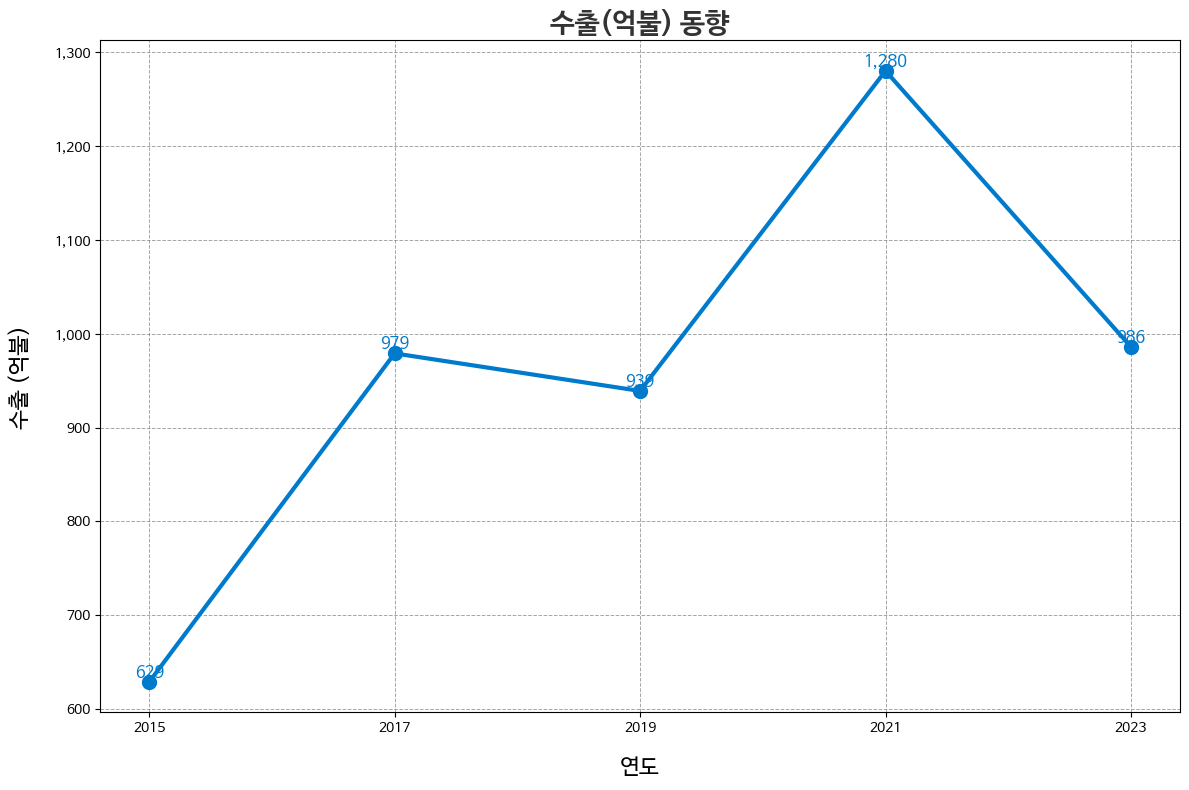

In [14]:
# 데이터 생성
data = {
    '항목': ['반도체 생산(조원)', '시장점유율(%)', '수출(억불)', '수출증가율(%)', '수입(억불)', '수입증가율(%)', 'DRAM 가격($)'],
    '2015': [69, 17, 629, 0, 383, 5, 3],
    '2017': [103, 18, 979, 57, 412, 5, 2],
    '2019': [134, 18, 939, -26, 470, 5, 2],
    '2021': [201, 20, 1280, 29, 614, 22, 3],
    '2023': [224, 13, 986, 24, 624, 17, 2]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# '항목' 열을 인덱스로 설정
df.set_index('항목', inplace=True)

# 수출(억불) 데이터만 추출
df_export = df.loc['수출(억불)']

# 라인 플롯 생성
plt.figure(figsize=(12, 8))
plt.plot(df_export.index, df_export.values, marker='o', linestyle='-', color='#007ACC', linewidth=3, markersize=10)

# 그래프 제목과 축 레이블 추가
plt.title('수출(억불) 동향', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('연도', fontsize=16, labelpad=15)
plt.ylabel('수출 (억불)', fontsize=16, labelpad=15)

# Y축 값에 천 단위 콤마 추가
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 그리드 추가
plt.grid(True, linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# 데이터 값 표시
for i, value in enumerate(df_export.values):
    plt.text(df_export.index[i], value, f'{int(value):,}', fontsize=12, ha='center', va='bottom', color='#007ACC')

# 그래프 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()

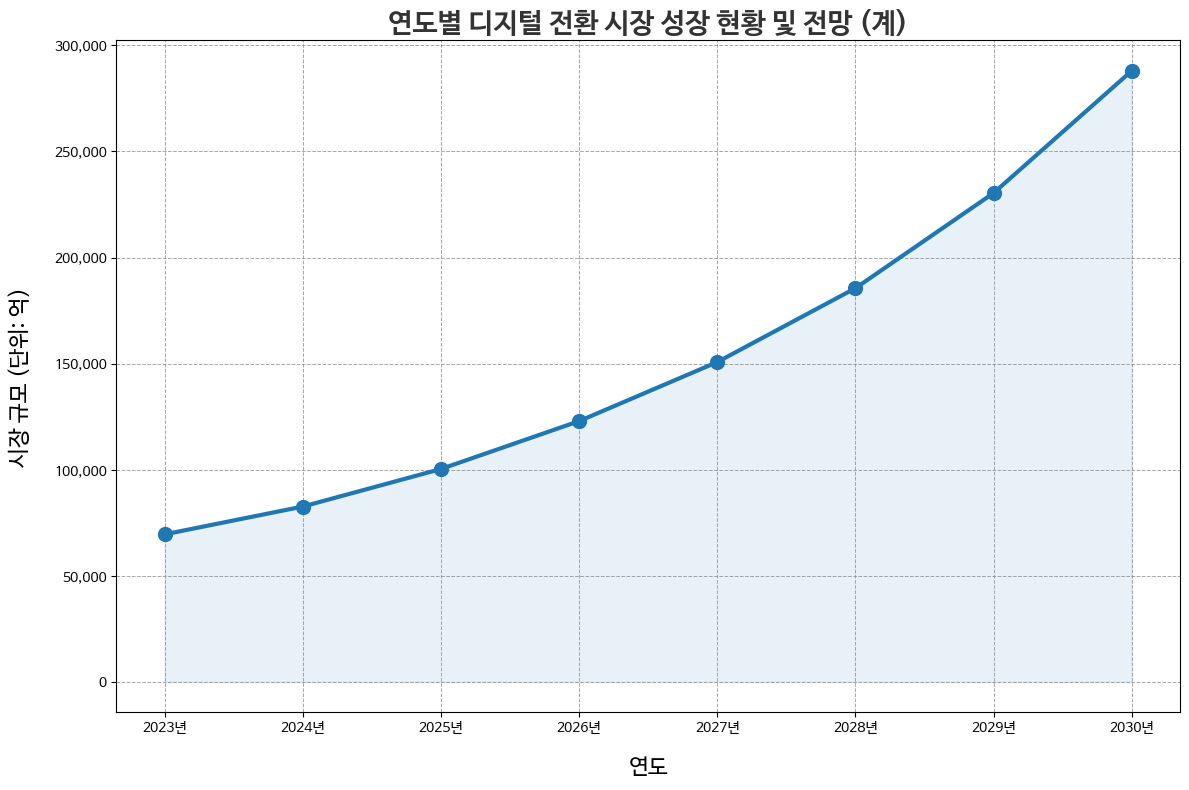

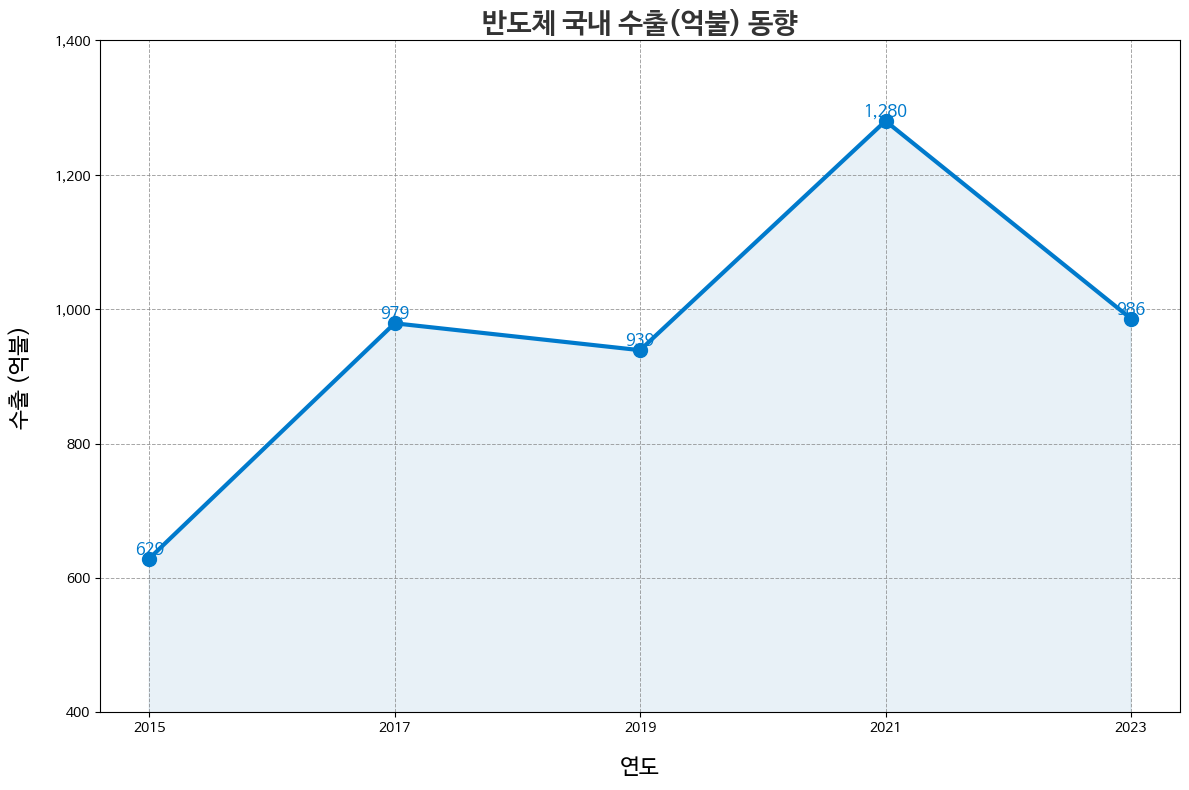

In [18]:
# 데이터 생성
data_growth = {
    "대륙 구분": ["북미", "유럽", "아시아태평양", "중동&아프리카", "남미", "계"],
    "2023년": [21385.6, 17645.2, 16891.6, 7552.4, 6218.9, 69546.6],
    "2024년": [25069.0, 20873.1, 20291.1, 8942.9, 7476.5, 82652.6],
    "2025년": [30198.1, 25331.8, 24902.3, 10824.9, 9186.8, 100343.9],
    "2026년": [36674.2, 30782.8, 30337.4, 13129.1, 11313.8, 122912.4],
    "2027년": [44653.0, 37085.2, 38307.0, 16438.9, 13983.3, 150737.8],
    "2028년": [54322.9, 46114.0, 47565.8, 20318.6, 17353.4, 185547.9],
    "2029년": [66777.2, 57035.8, 59681.6, 25164.9, 21726.4, 230381.4],
    "2030년": [82612.4, 71006.0, 75362.4, 31584.4, 27400.0, 287965.2],
    "CAGR(%)": [21.4, 22.0, 23.8, 22.7, 23.6, 22.5]
}

# 데이터프레임 생성
df_growth = pd.DataFrame(data_growth)

# "계" 행의 데이터만 추출
total_growth = df_growth[df_growth["대륙 구분"] == "계"].iloc[0, 1:-1]

# 연도별 데이터
years_growth = total_growth.index.astype(str)  # 연도를 문자열로 변환
values_growth = total_growth.values.astype(float)  # 값들을 실수형으로 변환

# 그래프 그리기
plt.figure(figsize=(12, 8))
plt.plot(years_growth, values_growth, marker='o', linestyle='-', color='#1f77b4', linewidth=3, markersize=10)
plt.fill_between(years_growth, values_growth, color='#1f77b4', alpha=0.1)  # 그래프 아래 영역 채우기

# 그래프 제목과 축 레이블 추가
plt.title('연도별 디지털 전환 시장 성장 현황 및 전망 (계)', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('연도', fontsize=16, labelpad=15)
plt.ylabel('시장 규모 (단위: 억)', fontsize=16, labelpad=15)

# Y축에 천 단위 쉼표 표시
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# 그리드 추가
plt.grid(True, linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# 그래프 여백 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

# 두 번째 그래프: 수출(억불) 동향

# 데이터 생성
data_export = {
    '항목': ['반도체 생산(조원)', '시장점유율(%)', '수출(억불)', '수출증가율(%)', '수입(억불)', '수입증가율(%)', 'DRAM 가격($)'],
    '2015': [69, 17, 629, 0, 383, 5, 3],
    '2017': [103, 18, 979, 57, 412, 5, 2],
    '2019': [134, 18, 939, -26, 470, 5, 2],
    '2021': [201, 20, 1280, 29, 614, 22, 3],
    '2023': [224, 13, 986, 24, 624, 17, 2]
}

# 데이터프레임 생성
df_export = pd.DataFrame(data_export)

# '항목' 열을 인덱스로 설정
df_export.set_index('항목', inplace=True)

# 수출(억불) 데이터만 추출
export_values = df_export.loc['수출(억불)']

# 라인 플롯 생성
plt.figure(figsize=(12, 8))
plt.plot(export_values.index, export_values.values, marker='o', linestyle='-', color='#007ACC', linewidth=3, markersize=10)
plt.fill_between(export_values.index, export_values.values, color='#1f77b4', alpha=0.1)

# 그래프 제목과 축 레이블 추가
plt.title('반도체 국내 수출(억불) 동향', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('연도', fontsize=16, labelpad=15)
plt.ylabel('수출 (억불)', fontsize=16, labelpad=15)

# Y축 값에 천 단위 콤마 추가 및 범위 설정
plt.ylim(400, 1400)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 그리드 추가
plt.grid(True, linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# 데이터 값 표시
for i, value in enumerate(export_values.values):
    plt.text(export_values.index[i], value, f'{int(value):,}', fontsize=12, ha='center', va='bottom', color='#007ACC')

# 그래프 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()

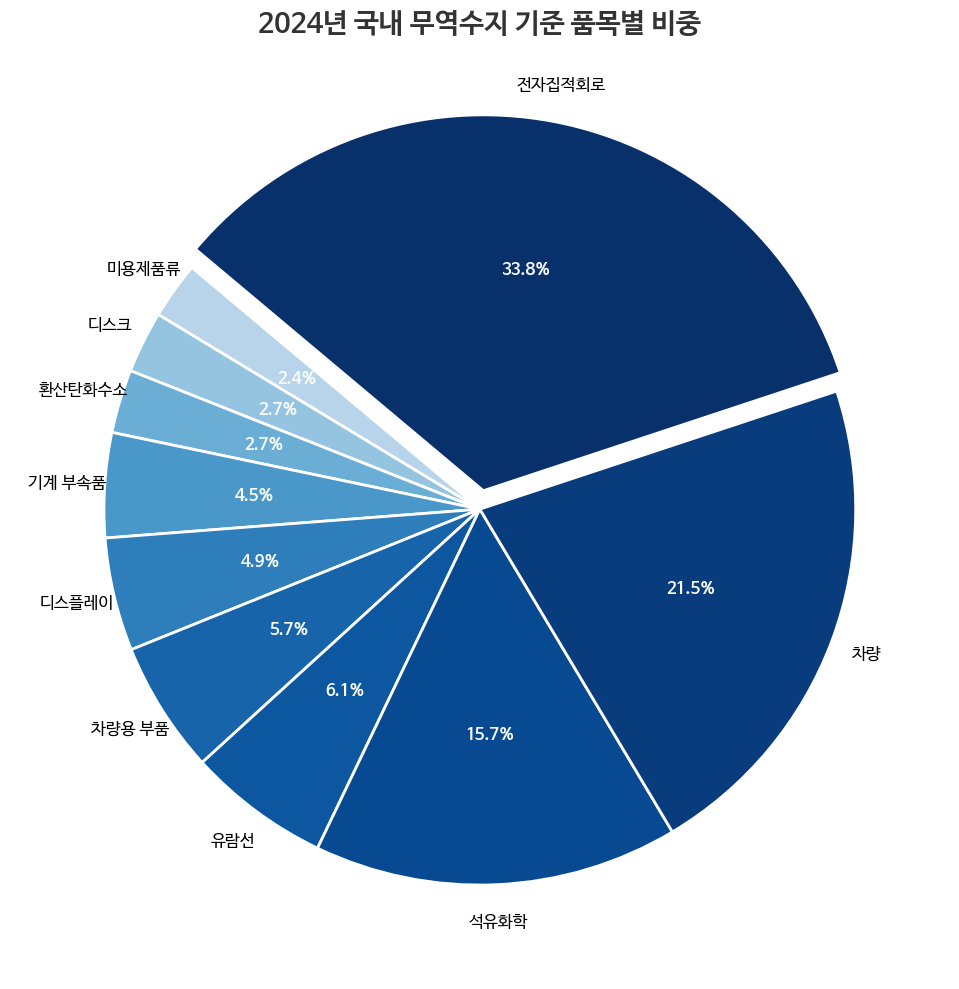

In [42]:
# 데이터 생성
data = {
    'HS코드': [8542, 8703, 2710, 8901, 8708, 9013, 8479, 2902, 8523, 3304],
    '품목': ['전자집적회로', '차량', '석유화학', '유람선', '차량용 부품', '디스플레이', '기계 부속품', '환산탄화수소', '디스크', '미용제품류'],
    '무역수지': [56061013,35691517,25986809,10153175,9409251,8080600,7461173,4528812\
             ,4405646,4062195]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# "전자집적회로"를 가장 밑으로 위치시키기 위해 데이터프레임 재정렬
df = df.set_index('품목')
df = df.reindex(df.index.difference(['전자집적회로']).tolist() + ['전자집적회로']).reset_index()

# 무역수지 값을 기준으로 데이터를 정렬
df = df.sort_values(by='무역수지', ascending=True).reset_index(drop=True)

# "전자집적회로" 부분을 강조하기 위해 explode 설정
explode = [0.05 if label == '전자집적회로' else 0 for label in df['품목']]

# 파이 차트 생성
plt.figure(figsize=(12, 10))

# 비율이 클수록 짙은 파란색으로 설정
colors = plt.cm.Blues([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0])

wedges, texts, autotexts = plt.pie(df['무역수지'], labels=df['품목'], autopct='%1.1f%%', startangle=140, colors=colors, 
                                   wedgeprops={'edgecolor': 'white', 'linewidth': 2}, textprops={'fontsize': 12}, explode=explode)

# 차트 제목 추가
plt.title('2024년 국내 무역수지 기준 품목별 비중', fontsize=20, fontweight='bold', color='#333333')

# 레이블을 바깥쪽으로 이동
for text in texts:
    text.set_fontsize(12)
    text.set_horizontalalignment('center')

# 퍼센트 텍스트 스타일 설정
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_weight('bold')

# 레이아웃 조정
plt.tight_layout()

# 차트 표시
plt.show()